## Combine all Musems & Normalizing

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json

In [2]:
df_british = pd.read_csv('British_result.csv') 
df_global = pd.read_csv('combined_Global.csv')
df_met = pd.read_csv('combined_Met.csv')
df_rosi = pd.read_csv('combined_Rosi.csv')

## Which columns to leave ?

`The common are & to normalize ✨🌿`
1. Object_classification
2. material
3. path
4. date
5. location 
6. description
7. period
8. dynasty
9. Name

In [3]:
def adjust_image_path(cellvalue, cat_museum):
    file_name = cellvalue.split('\\')[-1]
    file_name = file_name.split('.')[-2]
    new_name = f"{cat_museum}_{file_name}.jpg"
    return new_name 

### British Museum 

In [4]:
df_british.columns

Index(['Unnamed: 0', 'artifact_name', 'Object Type', 'Production date',
       'Description', 'Materials', 'Cultures/periods', 'path'],
      dtype='object')

In [5]:
df_british

,Unnamed: 0,artifact_name,Object Type,Production date,Description,Materials,Cultures/periods,path
0,0,ear-ring; bead,"ear-ring , bead",1stC-3rdC (?),Copper alloy ear-ring of thin wire with a loo...,copper alloy,NaN,A_1880-3687-m.json
1,1,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,A_1880-3711-o.json
2,2,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,A_1880-3714-a.json
3,3,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,A_1880-3717-f.json
4,4,ear-ring,ear-ring,1stC-3rdC (circa),"Cast, copper alloy hoop ear-ring bound with t...",copper alloy,NaN,A_1880-3960.json
...,...,...,...,...,...,...,...,...
56830,56830,papyrus,papyrus,NaN,Papyrus Harris; column 75; Discourse to Manki...,papyrus,['20th Dynasty'],Y_EA9999-75.json
56831,56831,papyrus,papyrus,NaN,Papyrus Harris; column 76; Discourse to Manki...,papyrus,['20th Dynasty'],Y_EA9999-76.json
56832,56832,papyrus,papyrus,NaN,Papyrus Harris; column 77; Discourse to Manki...,papyrus,['20th Dynasty'],Y_EA9999-77.json
56833,56833,papyrus,papyrus,NaN,Papyrus Harris; column 78; Discourse to Manki...,papyrus,['20th Dynasty'],Y_EA9999-78.json


In [6]:
len(df_british)  # one is missing

56835

In [7]:
df_british = df_british.rename(columns={"Production date":"date",'Object Type': 'object_classification', 'Materials':'material', 'image_path':'path', 'Cultures/periods_ex': 'dynasty', 'Description_ex':'description', "artifact_name":"name"})

In [8]:
# df_british['date'] = None
df_british['location'] = None # the location in this data is just the place "Egypt"
df_british['period'] = None


In [9]:
df_british['path'] = df_british['path'].apply(lambda cellvalue: adjust_image_path(cellvalue, "bri"))

In [10]:

other_cols= list(df_british.columns.difference(["path"]))

In [11]:
df_british

,Unnamed: 0,name,object_classification,date,Description,material,Cultures/periods,path,location,period
0,0,ear-ring; bead,"ear-ring , bead",1stC-3rdC (?),Copper alloy ear-ring of thin wire with a loo...,copper alloy,NaN,bri_A_1880-3687-m.jpg,None,None
1,1,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3711-o.jpg,None,None
2,2,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3714-a.jpg,None,None
3,3,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3717-f.jpg,None,None
4,4,ear-ring,ear-ring,1stC-3rdC (circa),"Cast, copper alloy hoop ear-ring bound with t...",copper alloy,NaN,bri_A_1880-3960.jpg,None,None
...,...,...,...,...,...,...,...,...,...,...
56830,56830,papyrus,papyrus,NaN,Papyrus Harris; column 75; Discourse to Manki...,papyrus,['20th Dynasty'],bri_Y_EA9999-75.jpg,None,None
56831,56831,papyrus,papyrus,NaN,Papyrus Harris; column 76; Discourse to Manki...,papyrus,['20th Dynasty'],bri_Y_EA9999-76.jpg,None,None
56832,56832,papyrus,papyrus,NaN,Papyrus Harris; column 77; Discourse to Manki...,papyrus,['20th Dynasty'],bri_Y_EA9999-77.jpg,None,None
56833,56833,papyrus,papyrus,NaN,Papyrus Harris; column 78; Discourse to Manki...,papyrus,['20th Dynasty'],bri_Y_EA9999-78.jpg,None,None


In [12]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json
import random
from PIL import Image
import IPython.display as display

In [13]:
def print_value_count(df, col, range):
    x =df[col].value_counts()
    plt.figure(figsize=(12,8))
    plt.xticks(rotation=90)
    plt.bar(x = x.index[0:range] ,  height= x.values[0:range])
    return x.index[0:range]

### Global Museum

In [14]:
df_global.columns

Index(['Unnamed: 0', 'Archaeological Site', 'Category', 'Material', 'Dating',
       'Description', 'Path', 'Name'],
      dtype='object')

In [15]:
df_global = df_global.drop(columns=['Unnamed: 0'])

In [16]:
df_global ['Path'] = df_global ['Path'].apply(lambda cellvalue: adjust_image_path(cellvalue, "glo"))
df_global .head(5)

,Archaeological Site,Category,Material,Dating,Description,Path,Name
0,el-faiyum,relief,limestone,roman period,several late period texts mention a lion god n...,glo_1.jpg,tithoes
1,unknown,coptic textile,wool,byzantine period,"this piece of fabric is a so-called ""taquetã©'...",glo_10.jpg,fragment of wedge shape
2,governorate of faiyum,basket,rush,graeco-roman period,this basket comes from the excavations of b. g...,glo_100.jpg,basket with lid
3,abydos,palette,greywacke,early dynastic period,this fragment of a rectangular palette diagram...,glo_1000.jpg,fragment of rectangular palette
4,thebes: west bank,finger ring,bronze,unknown,NaN,glo_10000.jpg,NaN


In [17]:
df_global = df_global.rename(columns={'Archaeological Site':'location', 'Category': 'object_classification','Material': 'material', 'Dating': 'period','Description':'description', "Name":'name',"Path":'path'})

In [18]:
df_global["date"] = None
df_global["dynasty"] = None


In [19]:
df_global

,location,object_classification,material,period,description,path,name,date,dynasty
0,el-faiyum,relief,limestone,roman period,several late period texts mention a lion god n...,glo_1.jpg,tithoes,None,None
1,unknown,coptic textile,wool,byzantine period,"this piece of fabric is a so-called ""taquetã©'...",glo_10.jpg,fragment of wedge shape,None,None
2,governorate of faiyum,basket,rush,graeco-roman period,this basket comes from the excavations of b. g...,glo_100.jpg,basket with lid,None,None
3,abydos,palette,greywacke,early dynastic period,this fragment of a rectangular palette diagram...,glo_1000.jpg,fragment of rectangular palette,None,None
4,thebes: west bank,finger ring,bronze,unknown,NaN,glo_10000.jpg,NaN,None,None
...,...,...,...,...,...,...,...,...,...
15904,unknown,amulet,faience,unknown,NaN,glo_9995.jpg,NaN,None,None
15905,thebes: west bank,necklace,shell,unknown,NaN,glo_9996.jpg,NaN,None,None
15906,unknown,necklace,faience,unknown,NaN,glo_9997.jpg,NaN,None,None
15907,unknown,necklace,faience,unknown,NaN,glo_9998.jpg,NaN,None,None


In [20]:
type(df_global["description"][15904]) 

float

In [21]:
len(df_global)

15909

### Met Museum


In [22]:
df_met.columns

Index(['Unnamed: 0', 'objectDate', 'locus', 'city', 'objectName', 'subregion',
       'period', 'Path', 'title', 'dynasty', 'reign', 'classification',
       'medium', 'region'],
      dtype='object')

In [23]:
df_met = df_met.drop(columns=['Unnamed: 0',"locus"])

In [24]:
df_met['Path'] = df_met['Path'].apply(lambda cellvalue: adjust_image_path(cellvalue, "met"))
df_met.head(5)

,objectDate,city,objectName,subregion,period,Path,title,dynasty,reign,classification,medium,region
0,664-30 B.C.,unknown,"Bastet, standing, aegis, basket",unknown,Late Period -Ptolemaic Period,met_329767.jpg,Bastet holding aegis and basket,Dynasty 26 or later,unknown,unknown,Cupreous metal,unknown
1,ca. 1850-1650 B.C.,unknown,Upper half of a woman from a pair or group statue,unknown,Late Middle Kingdom,met_329768.jpg,Upper half of a woman from a pair or group statue,Late Dynasty 12-13,unknown,unknown,Granite,unknown
2,ca. 664-525 B.C.,unknown,Head from a figure of Osiris,unknown,Late Period,met_329769.jpg,Head from a figure of Osiris,Dynasty 26,unknown,unknown,Graywacke,unknown
3,664-30 B.C.,unknown,"figure, Osiris",unknown,Late Period-Ptolemaic Period,met_329771.jpg,Figure of Osiris,unknown,unknown,unknown,Cupreous metal,unknown
4,ca. 1850-1650 B.C.,unknown,Head and chest of a shabti figure,unknown,Middle Kingdom,met_329774.jpg,Head and chest of a shabti figure,late Dynasty 12 to Dynasty 13,unknown,unknown,Steatite or serpentinite,unknown


In [25]:
df_met["dynasty"].value_counts()

dynasty
unknown                             5420
Dynasty 18                          3172
Dynasty 12-13                        922
Dynasty 21                           781
Dynasty 12                           739
                                    ... 
Dynasty 12, mid- Dynasy 13             1
Dynasty 12,mid-Dynasty 13              1
Dynasty 11-early 18                    1
late Dynasty 17-early Dynasty 18       1
18                                     1
Name: count, Length: 273, dtype: int64

In [26]:
df_met['object_classification'] = df_met['objectName'].str.split(',')
df_met = df_met.drop(columns=["objectName"])
df_met['location'] = df_met.apply(lambda row: [v for v in [row['city'], row['subregion'], row['region']] if pd.notna(v) and v != "unknown"], axis=1)
df_met = df_met.drop(columns=['city', 'subregion' ,'region','classification'])
df_met['period'] = df_met.apply(lambda row: [v for v in [row['reign'], row['period']] if pd.notna(v) and v != "unknown"], axis=1)
df_met = df_met.drop(columns=['reign'])
df_met["name"] = df_met["title"]

In [27]:
df_met= df_met.rename(columns={'title': 'description',  'Path':'path', 'objectDate':'date', 'medium':'material'})

In [28]:
df_met

,date,period,path,description,dynasty,material,object_classification,location,name
0,664-30 B.C.,[Late Period -Ptolemaic Period],met_329767.jpg,Bastet holding aegis and basket,Dynasty 26 or later,Cupreous metal,"[Bastet, standing, aegis, basket]",[],Bastet holding aegis and basket
1,ca. 1850-1650 B.C.,[Late Middle Kingdom],met_329768.jpg,Upper half of a woman from a pair or group statue,Late Dynasty 12-13,Granite,[Upper half of a woman from a pair or group st...,[],Upper half of a woman from a pair or group statue
2,ca. 664-525 B.C.,[Late Period],met_329769.jpg,Head from a figure of Osiris,Dynasty 26,Graywacke,[Head from a figure of Osiris],[],Head from a figure of Osiris
3,664-30 B.C.,[Late Period-Ptolemaic Period],met_329771.jpg,Figure of Osiris,unknown,Cupreous metal,"[figure, Osiris]",[],Figure of Osiris
4,ca. 1850-1650 B.C.,[Middle Kingdom],met_329774.jpg,Head and chest of a shabti figure,late Dynasty 12 to Dynasty 13,Steatite or serpentinite,[Head and chest of a shabti figure],[],Head and chest of a shabti figure
...,...,...,...,...,...,...,...,...,...
15163,19th century,[],met_85658.jpg,Dress,unknown,"Cotton, metal wrapped thread",[Dress],[],Dress
15164,19th century,[],met_85659.jpg,Dress,unknown,"Cotton, metal wrapped thread",[Dress],[],Dress
15165,664-30 B.C.,[Late Period - Ptolemaic Period],met_857670.jpg,Figure of a rearing cobra with feline head,unknown,Bronze or cupreous alloy,[Figure of a rearing cobra with feline head],[],Figure of a rearing cobra with feline head
15166,ca. 1550-1295 B.C.,[New Kingdom],met_905798.jpg,Gold foil fragments,Dynasty 18,Gold leaf,[gold foil fragments],"[Dra Abu el-Naga, Upper Egypt, Thebes]",Gold foil fragments


In [29]:
len(df_met) # lol 1000 out 

15168

### Rosi Museum

In [30]:
df_rosi.columns

Index(['Unnamed: 0', 'Title', 'Culture', 'Dynasty', 'Date', 'Period',
       'Material', 'object_Type', 'Path'],
      dtype='object')

In [31]:
df_rosi["Culture"].value_counts()

Culture
Egyptian        733
Mesopotamian     77
Oriental          3
Greek             1
Name: count, dtype: int64

In [32]:
#df_rosi= df_rosi[df_rosi["Culture"] == 'Egyptian']

In [33]:
df_rosi = df_rosi.drop(columns=['Unnamed: 0', 'Culture'])

In [34]:
df_rosi['Path'] = df_rosi['Path'].apply(lambda cellvalue: adjust_image_path(cellvalue, "ros"))
df_rosi.head(5)

,Title,Dynasty,Date,Period,Material,object_Type,Path
0,RC-1 - Sekhmet Statue,NaN,332-30 BCE,Ptolemaic,Bronze,Sculpture,ros_789.jpg
1,RC-2 - Harpocrates,NaN,305 - 30 BCE,Ptolemaic,Bronze,Sculpture,ros_931.jpg
2,RC-3 - Osiris,NaN,332 - 31 BCE,Ptolemaic,Bronze,Sculpture,ros_365.jpg
3,RC-4 - Khonsu,NaN,332 - 30 BCE,Ptolemaic,Bronze,Sculpture,ros_774.jpg
4,RC-5 - Apis Bull,NaN,525 - 343 BCE,Late Period,Bronze,Sculpture,ros_913.jpg


In [35]:
df_rosi= df_rosi.rename(columns={'Title': 'name',  'Path':'path', 'Material':'material', 'Date':'date','object_Type':'object_classification', 'Period':'period', "Dynasty":'dynasty'})

In [36]:
df_rosi["description"]=None
df_rosi['location'] = None

In [37]:
df_rosi

,name,dynasty,date,period,material,object_classification,path,description,location
0,RC-1 - Sekhmet Statue,NaN,332-30 BCE,Ptolemaic,Bronze,Sculpture,ros_789.jpg,None,None
1,RC-2 - Harpocrates,NaN,305 - 30 BCE,Ptolemaic,Bronze,Sculpture,ros_931.jpg,None,None
2,RC-3 - Osiris,NaN,332 - 31 BCE,Ptolemaic,Bronze,Sculpture,ros_365.jpg,None,None
3,RC-4 - Khonsu,NaN,332 - 30 BCE,Ptolemaic,Bronze,Sculpture,ros_774.jpg,None,None
4,RC-5 - Apis Bull,NaN,525 - 343 BCE,Late Period,Bronze,Sculpture,ros_913.jpg,None,None
...,...,...,...,...,...,...,...,...,...
819,RC-297 - Ptah,NaN,NaN,NaN,Bronze,Sculpture,ros_221.jpg,None,None
820,RC-251 - Rameses Ii Cartouche Fragment,NaN,NaN,NaN,Granite,Epigraphy,ros_64.jpg,None,None
821,RC-1727 - False Door with Ibis,NaN,NaN,NaN,Limestone,Funerary,ros_536.jpg,None,None
822,RC-5187 - Scarab,13TH,1784-1668 BCE,2nd Intermediate,Faience,Amulets,ros_863.jpg,None,None


In [38]:
len(df_rosi)

824

## Combine
- () Separate period into period and dynasty
- Add again the egyptian and not egyptian

In [39]:
# Get the symmetric differences between the sets of column names
columns_difference = set(df_met.columns).symmetric_difference(df_british.columns).symmetric_difference(df_global.columns).symmetric_difference(df_rosi.columns)

# Display the columns that are different between the DataFrames
print("Columns that are different between the DataFrames:", columns_difference)

Columns that are different between the DataFrames: {'Unnamed: 0', 'Cultures/periods', 'Description', 'dynasty', 'description'}


In [40]:
df_all = pd.concat([df_british, df_global, df_met, df_rosi], ignore_index=True)

In [41]:
df_all

,Unnamed: 0,name,object_classification,date,Description,material,Cultures/periods,path,location,period,description,dynasty
0,0.0,ear-ring; bead,"ear-ring , bead",1stC-3rdC (?),Copper alloy ear-ring of thin wire with a loo...,copper alloy,NaN,bri_A_1880-3687-m.jpg,None,None,NaN,NaN
1,1.0,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3711-o.jpg,None,None,NaN,NaN
2,2.0,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3714-a.jpg,None,None,NaN,NaN
3,3.0,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3717-f.jpg,None,None,NaN,NaN
4,4.0,ear-ring,ear-ring,1stC-3rdC (circa),"Cast, copper alloy hoop ear-ring bound with t...",copper alloy,NaN,bri_A_1880-3960.jpg,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88731,NaN,RC-297 - Ptah,Sculpture,NaN,NaN,Bronze,NaN,ros_221.jpg,None,NaN,None,NaN
88732,NaN,RC-251 - Rameses Ii Cartouche Fragment,Epigraphy,NaN,NaN,Granite,NaN,ros_64.jpg,None,NaN,None,NaN
88733,NaN,RC-1727 - False Door with Ibis,Funerary,NaN,NaN,Limestone,NaN,ros_536.jpg,None,NaN,None,NaN
88734,NaN,RC-5187 - Scarab,Amulets,1784-1668 BCE,NaN,Faience,NaN,ros_863.jpg,None,2nd Intermediate,None,13TH


In [42]:
df_all.to_csv("trial_cleaning1.csv")

In [43]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88736 entries, 0 to 88735
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             56835 non-null  float64
 1   name                   84362 non-null  object 
 2   object_classification  88659 non-null  object 
 3   date                   49457 non-null  object 
 4   Description            56835 non-null  object 
 5   material               87965 non-null  object 
 6   Cultures/periods       50528 non-null  object 
 7   path                   88736 non-null  object 
 8   location               31077 non-null  object 
 9   period                 31698 non-null  object 
 10  description            26071 non-null  object 
 11  dynasty                15518 non-null  object 
dtypes: float64(1), object(11)
memory usage: 8.1+ MB


### `1. Name`

In [44]:
def clean_column(column):
    # Convert to lowercase
    column = column.str.lower()

    # Remove anything within brackets
    column = column.str.replace(r'\(.*\)', '', regex=True)

    # Remove commas and semicolons
    column = column.str.replace('[,;]', '', regex=True)

    column = column.str.replace('[/]', ' ', regex=True)

    return column

# Example usage:
df_all['name'] = clean_column(df_all['name'])

### `2. Object Classification`
for later => try to collect similar items or synonymns together

In [45]:
df_all['object_classification'].value_counts().head(50)

object_classification
coin                           6840
shabti                         3797
figure                         2883
papyrus                        2630
ostracon                       2553
transport amphora              2316
amulet                         1851
vessel                         1675
bowl                           1514
figurine                       1453
[Textile fragment]             1424
scarab                         1389
stela                          1280
chalice                        1270
print                          1186
vase                           1117
statue                         1058
tablet                          986
weight                          933
jar                             920
 ostracon ,  vessel             712
bead                            659
ionian cup                      609
relief                          586
[Sealing]                       580
digital photograph (colour)     564
cup                             548
arrow-

In [46]:
import ast  # For literal_eval function
def clean_and_extract_first_value(column):
    # Convert to lowercase
    column = column.str.lower()

    # Convert string representations of lists to actual lists
    column = column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and '[' in x else x)

    # If the cell is a list, take only the first value
    column = column.apply(lambda x: x[0] if isinstance(x, list) else x)

    # Remove anything within brackets
    column = column.str.replace(r'\(.*\)', '', regex=True)

    # Remove leading and trailing spaces
    column = column.str.strip()

    return column

# Example usage:
# Assuming df is your DataFrame and 'YourColumn' is the column you want to clean
df_all['object_classification'] = clean_and_extract_first_value(df_all['object_classification'])

In [47]:
x = df_all['object_classification'].value_counts()
x.to_csv("frequency\object_trial.csv")

<BarContainer object of 50 artists>

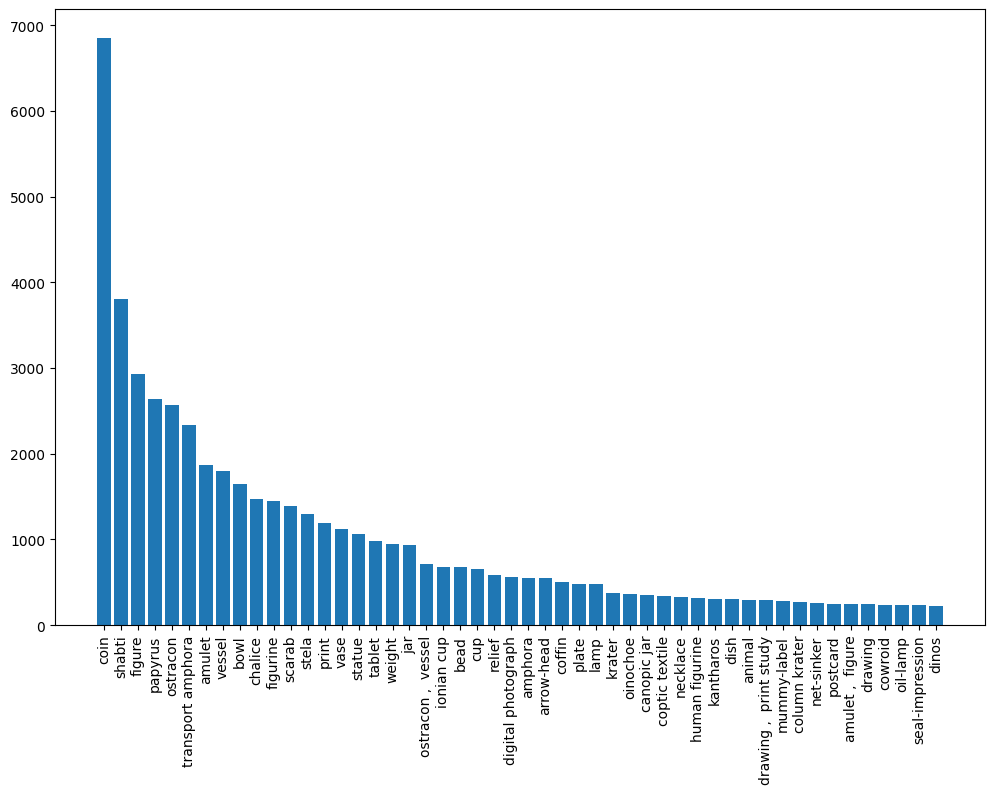

In [48]:
x =df_all['object_classification'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = x.index[0:50] ,  height= x.values[0:50])

In [49]:
only_shabti = df_all[df_all['object_classification'] == 'amphora']
only_shabti
#only_shabti.iloc[-1]

,Unnamed: 0,name,object_classification,date,Description,material,Cultures/periods,path,location,period,description,dynasty
8843,8843.0,amphora,amphora,535BC (circa),[Text from BM catalogue of vases] Pottery: bl...,pottery,"[' Attic ', ' Archaic Greek ']",bri_G_1849-0518-10.jpg,None,None,NaN,NaN
9205,9205.0,amphora,amphora,6thC-7thC,Pottery amphora for wine.,pottery,['Roman'],bri_G_1883-1124-34.jpg,None,None,NaN,NaN
9270,9270.0,amphora,amphora,610BC-580Bc (circa),Shoulder and body sherd (mended from four fra...,pottery,"[' East Greek ', ' Archaic Greek ']",bri_G_1886-0401-1050.jpg,None,None,NaN,NaN
9330,9330.0,amphora,amphora,600BC-575BC (circa),Body sherd (mended from two fragments) of Att...,pottery,"[' Attic ', ' Archaic Greek ']",bri_G_1886-0401-1100.jpg,None,None,NaN,NaN
9336,9336.0,amphora,amphora,600BC-575BC (circa),Body sherd of Attic black-figured pottery clo...,pottery,"[' Attic ', ' Archaic Greek ']",bri_G_1886-0401-1106.jpg,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70978,NaN,amphora,amphora,None,NaN,clay,NaN,glo_8408.jpg,masmas:-nag`gamus,meroitic period,"pottery amphora, truncate cone-shaped, with a ...",None
70990,NaN,amphora,amphora,None,NaN,clay,NaN,glo_8419.jpg,masmas:-nag`gamus,meroitic period,amphora with lateral handles. it has a narrow ...,None
71583,NaN,NaN,amphora,None,NaN,pottery,NaN,glo_8953.jpg,el-hiba,graeco-roman period,NaN,None
71803,NaN,NaN,amphora,None,NaN,sandstone,NaN,glo_9151.jpg,el-sheikh `abada,coptic period,NaN,None


### `3. date`
- combine similar and dates and synon.
- You well combine the dates that are between, for example find the largest interval and combine.

In [50]:
df_all['date'].value_counts()

date
ca. 1390-1352 B.C.     1038
6500BC-6000BC           777
ca. 1479-1458 B.C.      768
ca. 1981-1640 B.C.      552
575BC-550BC (circa)     542
                       ... 
450BC-375BC (?)           1
510BC–500BC               1
225BC - 100 BC            1
130 BC to 110 BC          1
1784-1668 BCE             1
Name: count, Length: 7100, dtype: int64

In [51]:
y =df_all['date'].value_counts()
#y.to_csv("date_trial.csv")

In [52]:
import pandas as pd
import re

def clean_date(cell):
    # Check if the cell is a valid string
    if isinstance(cell, str):
        # Remove "ca." and "."
        cleaned_cell = re.sub(r'ca\.|\.', '', cell)
        
        # Remove brackets and what they contain
        cleaned_cell = re.sub(r'\([^)]*\)', '', cleaned_cell)
        
        # Replace "bce" with "bc"
        cleaned_cell = cleaned_cell.replace('BCE', 'BC')
        # Make all lowercase
        cleaned_cell = cleaned_cell.lower()

        # Replace "bce" with "bc"
        cleaned_cell = cleaned_cell.replace('bce', 'bc')

        # Replace "bce" with "bc"
        cleaned_cell = cleaned_cell.replace(' - ', '-')
        
        # Remove leading and trailing spaces
        cleaned_cell = cleaned_cell.strip()
        
        return cleaned_cell
    else:
        return cell  # Return the original value if not a string

# Apply the function to the specified column
df_all['date'] = df_all['date'].apply(clean_date)

In [53]:
y =df_all['date'].value_counts()
y.to_csv("frequency\date_trial.csv")

In [54]:
y

date
1390-1352 bc      1039
6500bc-6000bc      777
1479-1458 bc       768
600 bc-570 bc      657
575bc-550bc        610
                  ... 
1070 bc-653 bc       1
332bc-641ad          1
31 bc-300 ad         1
630 bc- 525 bc       1
1784-1668 bc         1
Name: count, Length: 5246, dtype: int64

<BarContainer object of 50 artists>

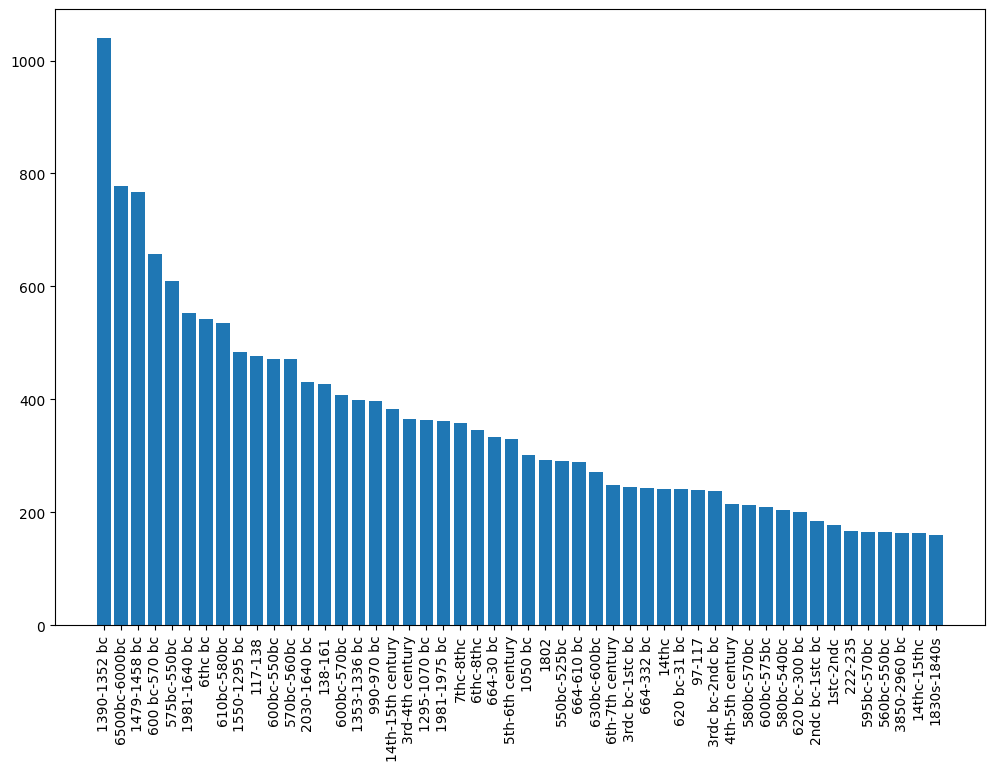

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = y.index[0:50] ,  height= y.values[0:50])

### `4. Description`

In [56]:
# Example usage:
df_all['description'] = clean_column(df_all['description'])

### `5. material`

In [59]:
df_all.columns

Index(['Unnamed: 0', 'name', 'object_classification', 'date', 'Description',
       'material', 'Cultures/periods', 'path', 'location', 'period',
       'description', 'dynasty'],
      dtype='object')

In [60]:
y =df_all['material'].value_counts()
#y.to_csv("material_trial.csv")

In [61]:
y

material
pottery                                 20928
copper alloy                             4743
limestone                                4559
glazed composition                       3766
papyrus                                  2709
                                        ...  
 horn ,  wood ,  palm fibre                 1
 bronze ,  wood ,  leather ,  linen         1
 bronze ,  wood (Ziziphus)                  1
 bronze ,  wood ,  linen ,  leather         1
Dried Bugs                                  1
Name: count, Length: 3162, dtype: int64

In [62]:
def clean_matrial_dynasty(column):
   # Remove content within parentheses
    column = column.str.replace(r'\([^)]*\)', '', regex=True)
    
    # Remove question marks
    column = column.str.replace('?', '')

     # Remove question marks
    column = column.str.replace('"', '')
    
    # Take only the first value if there is a cell with ","
    column = column.str.split(',').str[0]
    # Remove question marks
    column = column.str.replace('"', '')

    # Remove question marks
    column = column.str.replace(' )', '')


    # Remove leading and trailing spaces
    column = column.str.strip()

    # Convert all letters to lowercase
    column = column.str.lower()
    
    return column
# Example: Apply the function to a specific column in your DataFrame
df_all['material'] = clean_matrial_dynasty(df_all['material'])

In [63]:
y = df_all['material'].value_counts()
y.to_csv("frequency\material_trial2.csv")

In [64]:
y

material
pottery                        21999
limestone                       6110
copper alloy                    4887
faience                         4726
glazed composition              3896
                               ...  
cow hide                           1
cream-white glazed steatite        1
red breccia                        1
terracotta painted brown           1
dried bugs                         1
Name: count, Length: 791, dtype: int64

<BarContainer object of 50 artists>

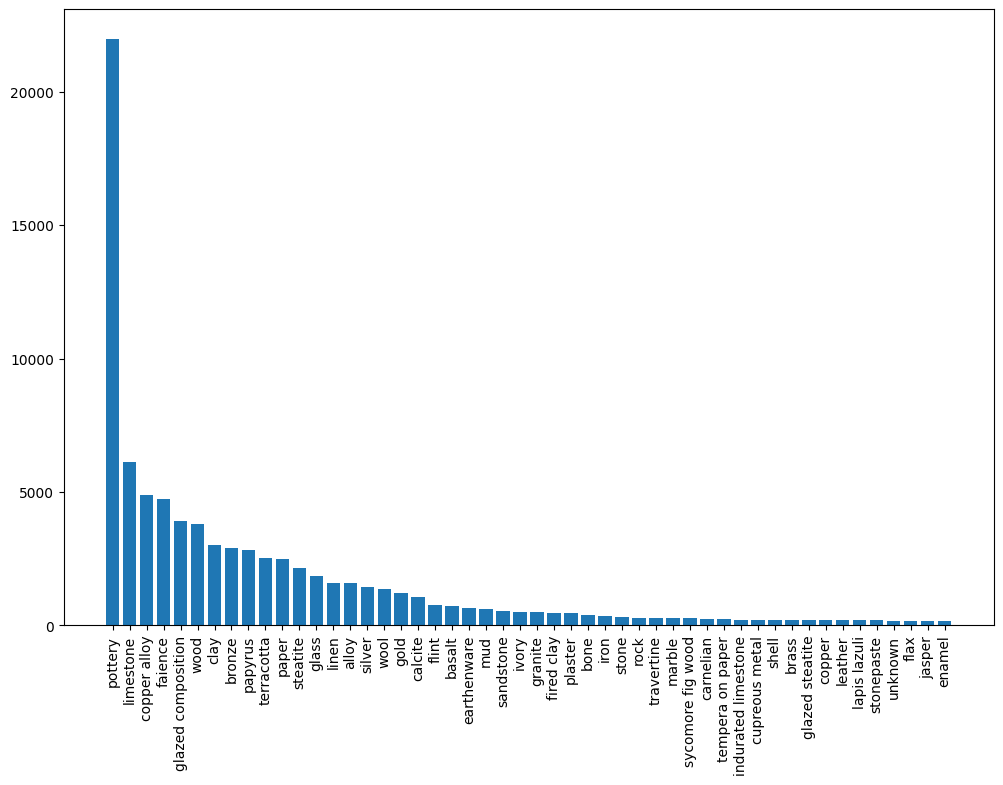

In [65]:
yy =df_all['material'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = yy.index[0:50] ,  height= yy.values[0:50])

### `6. dynasty`

In [66]:

y = df_all["dynasty"].value_counts()
#y.to_csv("dynasty_trial.csv")

In [67]:
y

dynasty
unknown                5420
Dynasty 18             3172
Dynasty 12-13           922
Dynasty 21              781
Dynasty 12              739
                       ... 
Dynasty 29                1
Probably Dynasty 26       1
Dynasty 25-29             1
Dynasty 19-25             1
13TH                      1
Name: count, Length: 345, dtype: int64

In [68]:
df_all['dynasty'] = clean_matrial_dynasty(df_all['dynasty'])

In [69]:
y = df_all["dynasty"].value_counts()
y.to_csv("frequency\dynasty_trial2.csv")
y

dynasty
unknown                     5420
dynasty 18                  3713
dynasty 12                   955
dynasty 12-13                928
dynasty 21                   795
                            ... 
late dynasty 12-early 13       1
dynasty 23-26                  1
dynasty 23-30                  1
ptolemaic                      1
13th                           1
Name: count, Length: 270, dtype: int64

<BarContainer object of 50 artists>

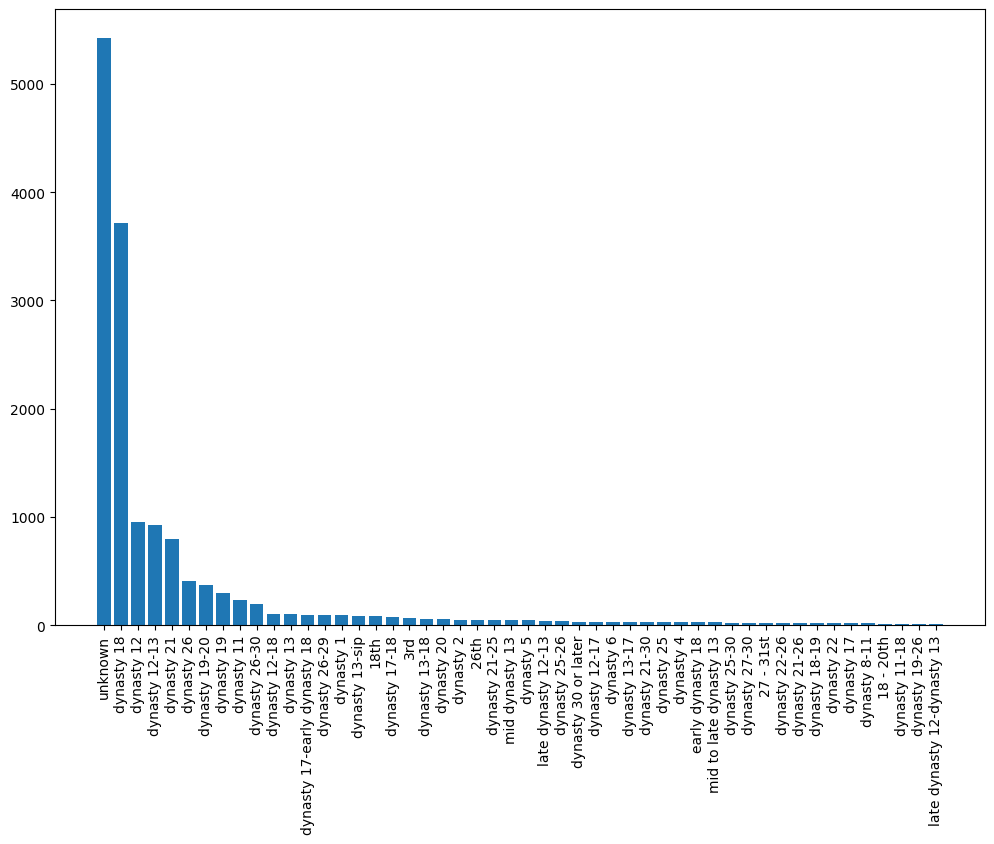

In [70]:
yyy =df_all['dynasty'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = yyy.index[0:50] ,  height= yyy.values[0:50])

### `7. location`

In [71]:
df_all["location"]

0        None
1        None
2        None
3        None
4        None
         ... 
88731    None
88732    None
88733    None
88734    None
88735    None
Name: location, Length: 88736, dtype: object

In [72]:

def clean_location(cell):
    if cell is None:
        return None  # Return None for NaN or None values

    if isinstance(cell, list):
        cell = str(cell)

    # Remove occurrences of "near", "probably", "possibly"
    cell = re.sub(r'\b(?:near|probably|possibly)\b', '', cell, flags=re.IGNORECASE)

    # Remove brackets and their contents
    cell = re.sub(r'\[.*?\]', '', cell)
    cell = re.sub(r'\{.*?\}', '', cell)
    cell = re.sub(r'\(.*?\)', '', cell)

    # Remove double quotes
    cell = cell.replace('"', '')

    # Remove extra spaces at the beginning and end
    cell = cell.strip()

    return cell
  
# Apply the function to the specified column
df_all['location'] = df_all['location'].apply(clean_location)



In [73]:
dd = df_all["location"].value_counts()
dd.to_csv("frequency\location_trial2.csv")

In [74]:
dd

location
                           15168
unknown                     8052
abydos                       528
mirgissa                     516
deir el-bahari               372
                           ...  
sakha                          1
kom el-hisn                    1
governorate of qena            1
temple of amenhotep iii        1
tafa                           1
Name: count, Length: 213, dtype: int64

<BarContainer object of 50 artists>

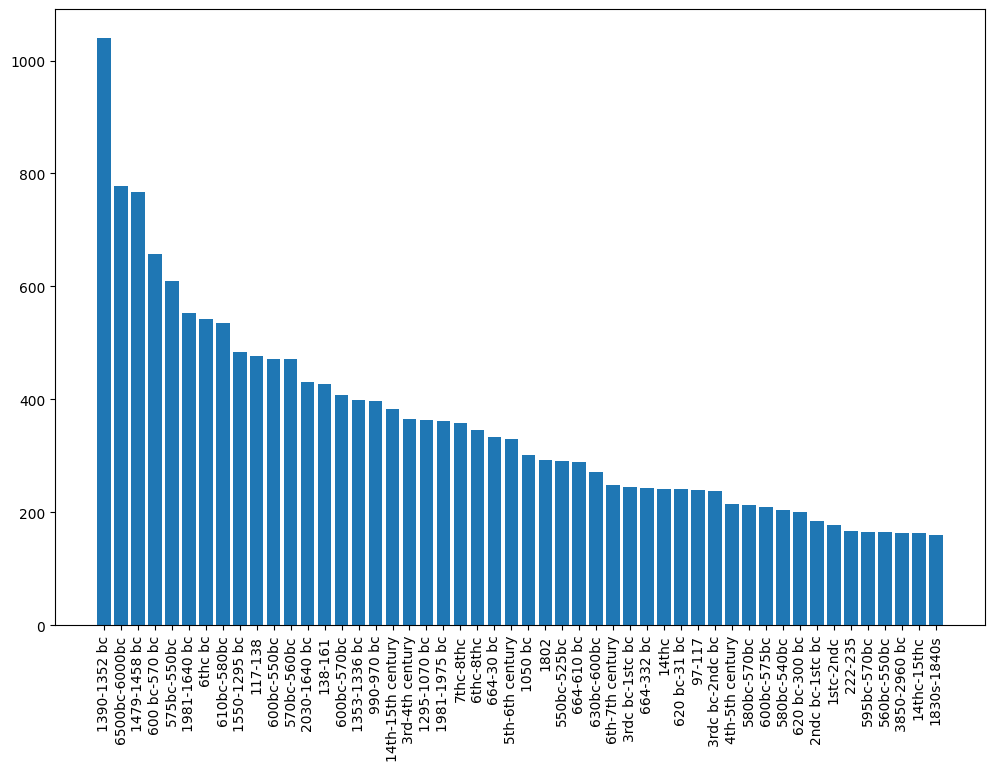

In [75]:
xx =df_all['date'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = xx.index[0:50] ,  height= xx.values[0:50])

### `8. period`

In [76]:
df_all["period"].value_counts()

period
[]                                                         3380
late period                                                2052
[Middle Kingdom]                                           1605
new kingdom                                                1475
unknown                                                    1438
                                                           ... 
[reign of Akhenaten to Aya, New Kingdom, Amarna Period]       1
[reign of Ptolemy II Philadelphos, Ptolemaic Period]          1
[reign of Psamtik I, Late Antique]                            1
[reign of Trajan, Roman Period, Trajan]                       1
Coptic Byzantine                                              1
Name: count, Length: 792, dtype: int64

In [77]:
# Apply the function to the specified column
def process_period(cell):
    if isinstance(cell, list):
        cell = ' '.join(map(str, cell))  # Convert list to string
    if isinstance(cell, str):
        # Remove brackets, double quotes, and make everything lowercase
        cell = cell.replace('[', '')
        cell = cell.replace(']', '')
        cell = cell.replace('"', '')
        cell = cell.lower()
        cell = cell.strip()
    return cell

# Apply the function to the specified column
df_all['period'] = df_all['period'].apply(process_period)

In [78]:
dd = df_all["period"].value_counts()
dd.to_csv("frequency\period_trial2.csv")

<BarContainer object of 50 artists>

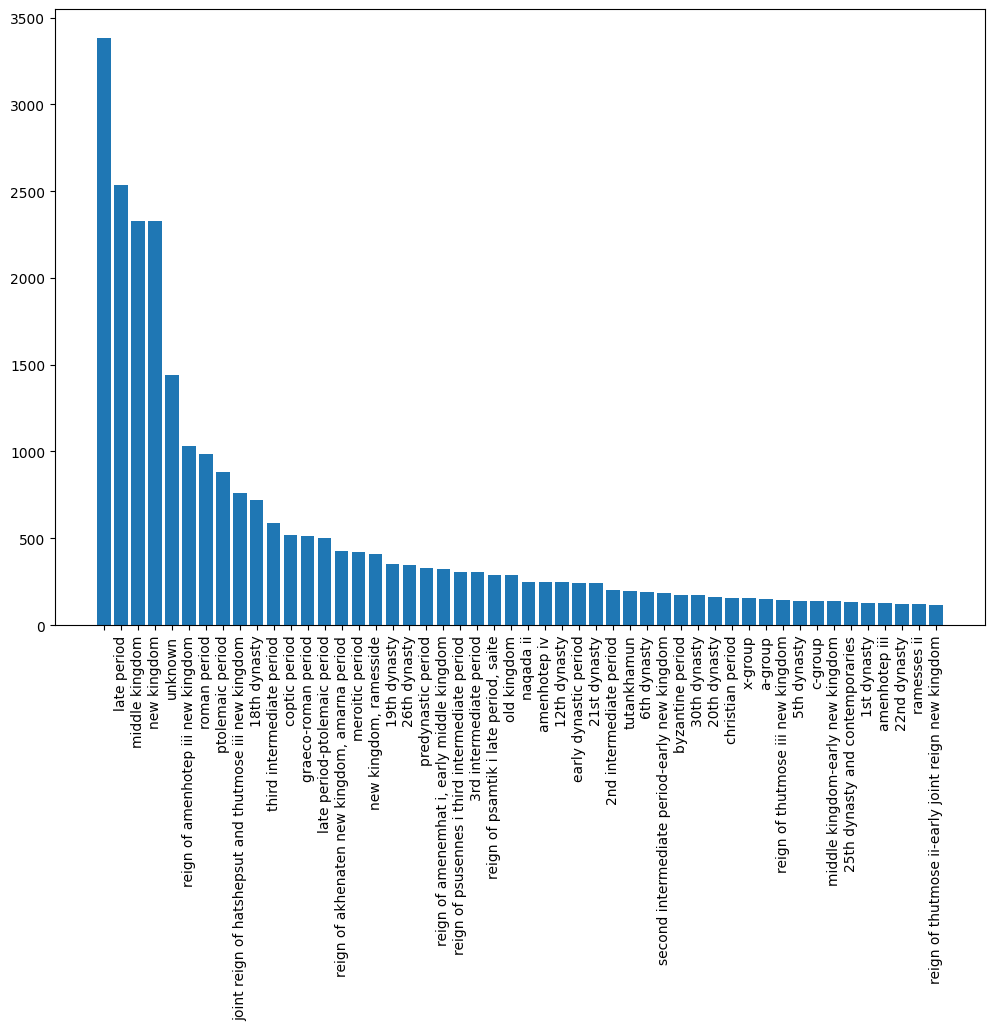

In [79]:
yx =df_all['period'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = yx.index[0:50] ,  height= yx.values[0:50])

#### What is left 
1. normalize all the unkown => unknown, nan, '' , ? , uncertain etc. to all be the same
2. combine the similar words into one further to decrease the classes

In [80]:
# # Select the row you want to duplicate (e.g., row with index 1)
# row_to_duplicate = df_all.loc[1]

# # Duplicate the selected row and modify something (e.g., change the name)
# duplicated_row = row_to_duplicate.copy()
# duplicated_row['path'] = 'bri_Y_EA9999-79.jpg'

# df_all = pd.concat([df_all, duplicated_row.to_frame().T], ignore_index=True)

In [81]:
df_all.to_csv("trial_cleaning2.csv")

In [82]:
len(df_all)

88737

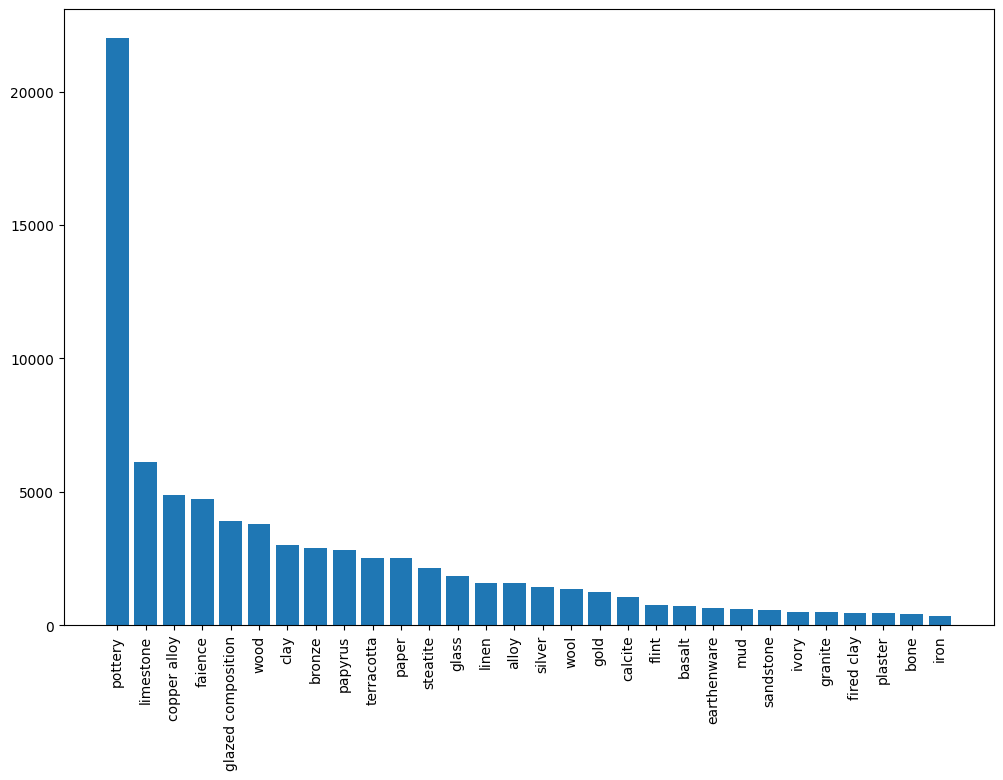

In [83]:
top30_material = print_value_count(df_all, "material", 30)